# Building A Prediction model to predict stock price of Apple.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

import tensorflow as tsrf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

#from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import MinMaxScaler




In [3]:
df = pd.read_csv('HistoricalData_1641407819284.csv')

In [4]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,01/04/2022,$179.7,99310440,$182.63,$182.94,$179.12
1,01/03/2022,$182.01,104701200,$177.83,$182.88,$177.71
2,12/31/2021,$177.57,64062260,$178.085,$179.23,$177.26
3,12/30/2021,$178.2,59773010,$179.47,$180.57,$178.09
4,12/29/2021,$179.38,62348930,$179.33,$180.63,$178.14


# Data Manipulation

In [5]:
#I will just need “Date” and “Close/Last” columns for this project. 
#getting rid of the other columns

df = df[['Date', 'Close/Last']]
df.head()

,Date,Close/Last
0,01/04/2022,$179.7
1,01/03/2022,$182.01
2,12/31/2021,$177.57
3,12/30/2021,$178.2
4,12/29/2021,$179.38


In [6]:
#Since I have a “$” sign in the closing price values data, 
#it might not be a float data type. When training the data, 
#string datatype will not work with this model, 
#I have to convert it to float or integer type.

df = df.replace({'\$':''}, regex = True)

df = df.astype({"Close/Last": float})
df["Date"] = pd.to_datetime(df.Date, format="%m/%d/%Y")
df.dtypes


Date          datetime64[ns]
Close/Last           float64
dtype: object

In [9]:
df.index = df['Date']
df

,Date,Close/Last
Date,,
2022-01-04,2022-01-04,179.70
2022-01-03,2022-01-03,182.01
2021-12-31,2021-12-31,177.57
2021-12-30,2021-12-30,178.20
2021-12-29,2021-12-29,179.38
...,...,...
2021-01-11,2021-01-11,128.98
2021-01-08,2021-01-08,132.05
2021-01-07,2021-01-07,130.92


# Data Visualization

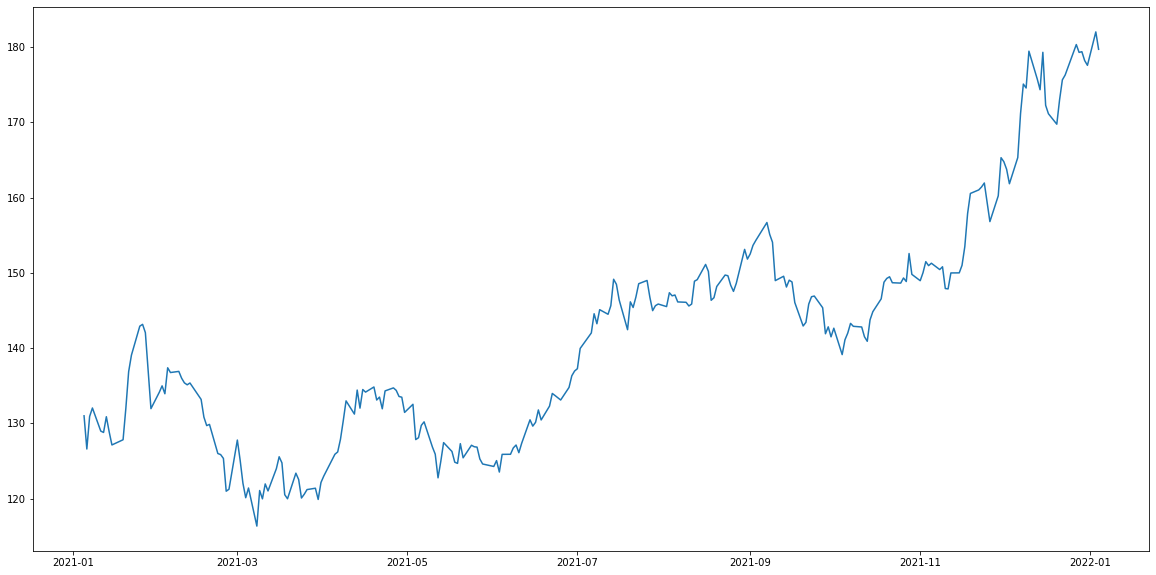

In [10]:
plt.plot(df["Close/Last"],label='Close Price history')

# Data Preparation

In [11]:
#to sort the data with their indexes which is the date
df = df.sort_index(ascending=True,axis=0)

data = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close/Last'])

for i in range(0,len(data)):
    data['Date'][i]=df['Date'][i]
    data['Close/Last'][i]=df['Close/Last'][i]
data.head()

,Date,Close/Last
0,2021-01-05 00:00:00,131.01
1,2021-01-06 00:00:00,126.6
2,2021-01-07 00:00:00,130.92
3,2021-01-08 00:00:00,132.05
4,2021-01-11 00:00:00,128.98


## Min-Max Scaler

In [10]:
scaler=MinMaxScaler(feature_range=(0,1))

data.index=data.Date
data.drop('Date',axis=1,inplace=True)

final_data = data.values
train_data=final_data[0:200,:]
valid_data=final_data[200:,:]

scaler=MinMaxScaler(feature_range=(0,1))

scaled_data=scaler.fit_transform(final_data)
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

NameError: name 'MinMaxScaler' is not defined

In [ ]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(np.shape(x_train_data)[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

model_data=data[len(data)-len(valid_data)-60:].values
model_data=model_data.reshape(-1,1)
model_data=scaler.transform(model_data)

# Train and Test Data

In [ ]:
lstm_model.compile(loss=’mean_squared_error’,optimizer=’adam’)
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)
X_test=[]
for i in range(60,model_data.shape[0]):
    X_test.append(model_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

# Predicted Function

In [1]:
predicted_stock_price=lstm_model.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

NameError: name 'lstm_model' is not defined

# Prediction Result

In [12]:
train_data=data[:200]
valid_data=data[200:]
valid_data['Predictions']=predicted_stock_price
plt.plot(train_data["Close/Last"])
plt.plot(valid_data[["Close/Last","Predictions"]])

NameError: name 'predicted_stock_price' is not defined